# Case study 06 (Week 10)

## **Description**

Do the following on titanic dataset.

1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [43]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn
import seaborn as sns
# Importing scipy itself
import scipy

## Task 01

Load the dataset into python environment

In [226]:
tdata = pd.read_csv("titanic_dataset.csv")
tdata.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 02

Make ‘PassengerId’ as the index column

In [227]:
# Setting PassengerId column as the index
tdata.set_index('PassengerId', inplace=True)
# To delete the default name assigned for Index after the above operation
# tdata.index.name = None
tdata.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 03

Check the basic details of the dataset

In [164]:
# Dataframe at a glance
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
# Checking for Null values
tdata.isna().sum().to_frame('Null value count')

,Null value count
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [20]:
# Fetching the statistical details of Dataframe
tdata.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
tdata.agg({'Age' : ['mode'], 'SibSp' : ['mode'], 'Parch' : ['mode'], 'Fare' : ['mode']})

,Age,SibSp,Parch,Fare
,mode,mode,mode,mode
0,24.0,0,0,8.05


In [28]:
# Getting info of Dtype: Object in the Dataframe
tdata.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


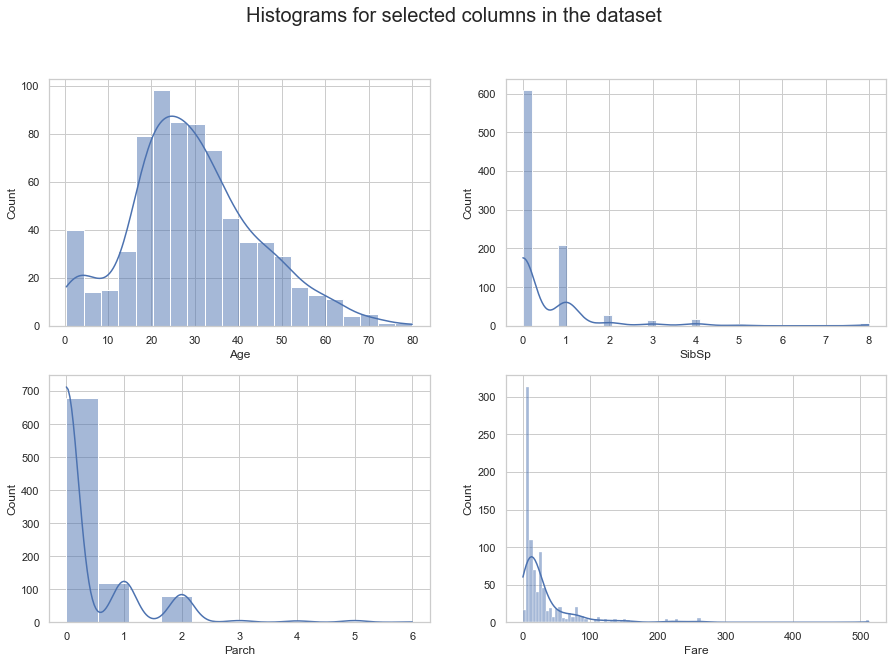

In [65]:
# select the columns to be plotted
cols = ['Age', 'SibSp', 'Parch', 'Fare']

# create the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Setting the sns plot theme
sns.set_theme(style="whitegrid")

# Giving a plot title
fig.suptitle('Histograms for selected columns in the dataset', fontsize=20)

# For making indexing easier, creating a contiguous flattened array
axes = axes.ravel()

for col, ax in zip(cols, axes):
    sns.histplot(data=tdata[col], kde=True, ax=ax)

plt.show()

### Insights :
* This Dataframe contains the passenger details of 891 persons.
* 3 Columns (Age, Cabin, Embarkked) contain Null values.
* Age column is intended to be int64 by default, but it's float64.
* Except Age; Sibsp, Parch and Fare columns are heavily skewed to +ve direction.
* There is noticable amount of outliers present in  Age, Sibsp, Parch and Fare.
* Most of the passengers are Male. 

## Task 04

Fill in all the missing values present in all the columns in the dataset

In [228]:
# Age column
tdata.Age.fillna(tdata.Age.median(), inplace=True)

In [166]:
tdata.isna().sum().to_frame('Null value count')

,Null value count
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [229]:
# Cabin column
tdata.Cabin.fillna("Undefined", inplace=True)

In [168]:
tdata.isna().sum().to_frame('Null value count')

,Null value count
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [230]:
# Embarked column
tdata.Embarked.fillna("tdata.Embarked.mode()", inplace=True)

In [170]:
tdata.isna().sum().to_frame('Null value count')

,Null value count
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


## Task 05

Check and handle outliers in at least 3 columns in the dataset

#### We already analysed and found some initial impressions about the data about outliers. Let's confirm our assumptions by ploting boxplots of those columns.  

In [174]:
tdata01 = tdata.drop(tdata.columns[[0, 1, 2, 3, 7, 9, 10]], axis = 1)

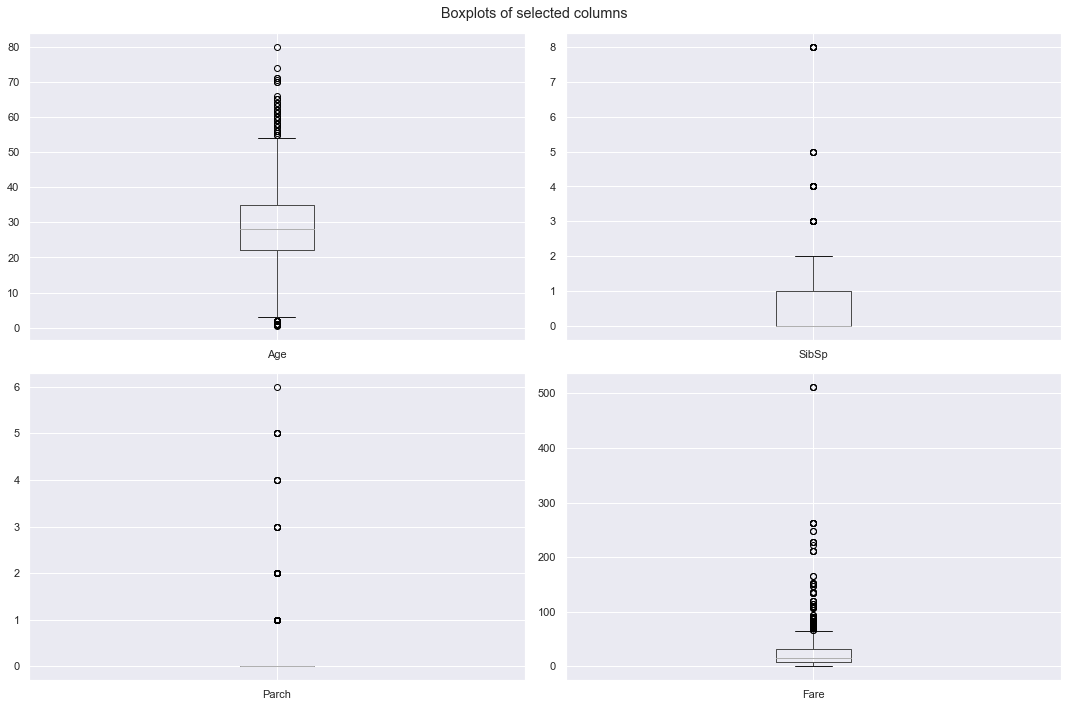

In [207]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of selected columns')

for i,el in enumerate(list(tdata01.columns.values)):
    a = tdata01.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout() 
plt.show()

#### 1. Age

In [231]:
# Getting lower and upperlimit of the outliers from percentile
Q1=np.percentile(tdata.Age,25,interpolation='midpoint')
Q2=np.percentile(tdata.Age,50,interpolation='midpoint')
Q3=np.percentile(tdata.Age,75,interpolation='midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers=[]
for i in tdata.Age:
    if i > upper_limit or i < lower_limit:
        outliers.append(i)

print(len(outliers),'Ouliers are there in Age column and they are given below:\n',outliers)


66 Ouliers are there in Age column and they are given below:
 [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [232]:
# Finding outliers and their indexes
ol=(tdata.Age > upper_limit) + (tdata.Age < lower_limit)
oli=tdata.loc[ol].index

In [233]:
# Dropping outliers by their indexes
tdata.drop(oli, inplace=True)

#### 2. SibSp

In [234]:
# Getting lower and upperlimit of the outliers from percentile
Q1=np.percentile(tdata.SibSp,25,interpolation='midpoint')
Q2=np.percentile(tdata.SibSp,50,interpolation='midpoint')
Q3=np.percentile(tdata.SibSp,75,interpolation='midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers=[]
for i in tdata.SibSp:
    if i > upper_limit or i < lower_limit:
        outliers.append(i)

print(len(outliers),'Ouliers are there in SibSp column and they are given below:\n',outliers)

39 Ouliers are there in SibSp column and they are given below:
 [3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [236]:
# Finding outliers and their indexes
ol=(tdata.SibSp > upper_limit) + (tdata.SibSp < lower_limit)
oli=tdata.loc[ol].index

In [237]:
# Dropping outliers by their indexes
tdata.drop(oli, inplace=True)

#### 3. Fare

In [238]:
# Getting lower and upperlimit of the outliers from percentile
Q1=np.percentile(tdata.Fare,25,interpolation='midpoint')
Q2=np.percentile(tdata.Fare,50,interpolation='midpoint')
Q3=np.percentile(tdata.Fare,75,interpolation='midpoint')

IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
outliers=[]
for i in tdata.Fare:
    if i > upper_limit or i < lower_limit:
        outliers.append(i)

print(len(outliers),'Ouliers are there in Fare column and they are given below:\n',outliers)

102 Ouliers are there in Fare column and they are given below:
 [71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


In [239]:
# Finding outliers and their indexes
ol=(tdata.Fare > upper_limit) + (tdata.Fare < lower_limit)
oli=tdata.loc[ol].index

In [240]:
# Dropping outliers by their indexes
tdata.drop(oli, inplace=True)

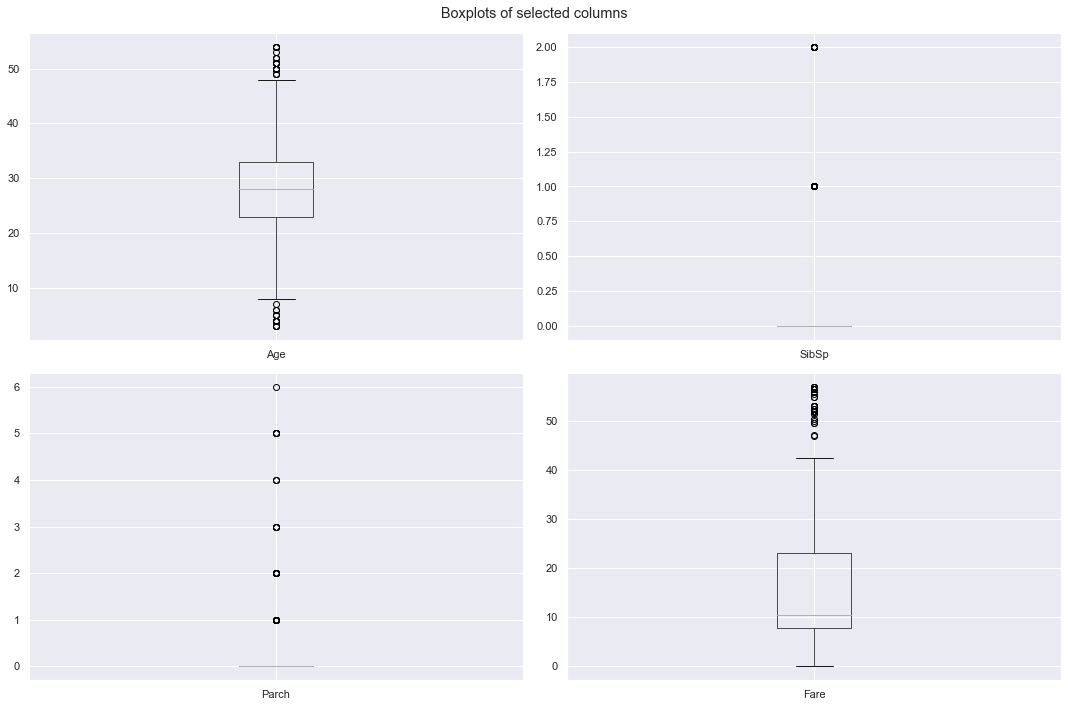

In [241]:
tdata02 = tdata.drop(tdata.columns[[0, 1, 2, 3, 7, 9, 10]], axis = 1)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of selected columns')

for i,el in enumerate(list(tdata02.columns.values)):
    a = tdata02.boxplot(el, ax=axes.flatten()[i])

plt.tight_layout() 
plt.show()

In [242]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  684 non-null    int64  
 1   Pclass    684 non-null    int64  
 2   Name      684 non-null    object 
 3   Sex       684 non-null    object 
 4   Age       684 non-null    float64
 5   SibSp     684 non-null    int64  
 6   Parch     684 non-null    int64  
 7   Ticket    684 non-null    object 
 8   Fare      684 non-null    float64
 9   Cabin     684 non-null    object 
 10  Embarked  684 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 64.1+ KB


## Task 06

Do min max scaling on the feature set (Take ‘Survived’ as target)

In [243]:
tdata.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,684,684,684,684,684
unique,684,2,592,72,3
top,"Braund, Mr. Owen Harris",male,1601,Undefined,S
freq,1,472,7,590,516


To accomplish a neat Min Max scaling, We have to execute an One hot encoding. Which will safely encodes the categorical data present in our dataframe

In [245]:
tdata03=tdata.drop(['Survived', 'Name', 'Ticket', 'Cabin'],axis=1)
tdata03=pd.get_dummies(tdata03)
tdata03.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
739,3,28.0,0,0,7.8958,0,1,0,0,1
139,3,16.0,0,0,9.2167,0,1,0,0,1
550,2,8.0,1,1,36.7500,0,1,0,0,1
146,2,19.0,1,1,36.7500,0,1,0,0,1
504,3,37.0,0,0,9.5875,1,0,0,0,1


In [247]:
# Assigning original column names to reassign after the processing
cols=tdata03.columns

from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
tdata03 = min_max.fit_transform(tdata03)
# Converting back to Pandas Dataframe
tdata03=pd.DataFrame(tdata03)
# Reassigning the original column names
tdata03.columns=cols

In [248]:
tdata03.head(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.372549,0.5,0.0,0.127193,0.0,1.0,0.0,0.0,1.0
1,1.0,0.450980,0.0,0.0,0.139035,1.0,0.0,0.0,0.0,1.0
2,0.0,0.627451,0.5,0.0,0.931579,1.0,0.0,0.0,0.0,1.0
3,1.0,0.627451,0.0,0.0,0.141228,0.0,1.0,0.0,0.0,1.0
4,1.0,0.490196,0.0,0.0,0.148391,0.0,1.0,0.0,1.0,0.0


In [249]:
tdata03.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268,0.309942,0.690058,0.146199,0.099415,0.754386
std,0.357408,0.185072,0.250491,0.125948,0.221255,0.462808,0.462808,0.353564,0.299438,0.430766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.490196,0.000000,0.000000,0.184211,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.000000,0.000000,0.404605,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*End of the file reached!*